In [1]:
import os
import sys
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

# from   getdist       import plots, MCSamples 
from   astropy.table import Table

In [2]:
sys.path.append(os.environ['HOME'] + '/DESI/')

In [3]:
import pubplot

from   schechter     import schechter, named_schechter
from   findfile      import findfile

In [4]:
version = 'GAMA4'
survey  = 'gama'
dryrun  =  False

In [5]:
fpath = findfile(ftype='gold', dryrun=dryrun, version=version, survey=survey)
fpath

'/cosma/home/durham/dc-moor2/data/GAMA4/gama_gold.fits'

In [6]:
gold = Table.read(fpath)
gold.meta

OrderedDict([('AREA', 180.0), ('GOLD_NGAL', 113687)])

##  VMAX

In [7]:
fpath = findfile(ftype='vmax', dryrun=dryrun, version=version, survey=survey)
vmax  = Table.read(fpath)
vmax

WEIGHT_STEPWISE,FIELD,MCOLOR_0P0,IN_D8LUMFN,MALL_0P0,ZSURV,ZMAX,ZMIN,VMAX,VZ
,,mag,,mag,,,,,
float64,bytes3,float64,int64,float64,float32,float64,float64,float64,float64
4.584470153194735,G12,-20.303152497562987,0,-20.273995797786338,0.17151,0.26298999786376953,0.03903000056743622,7594841.612883208,2214006.379379328
1.8026043529105293,G9,-18.212599115122458,0,-18.19906880860438,0.07959,0.11922916393998877,0.03903000056743622,749599.9257597037,208458.9792430824
3.2372516172360464,G15,-20.49260656626233,0,-20.637679026436892,0.12615,0.26298999786376953,0.03903000056743622,7594841.612883208,889245.9030587805
5.257448359247273,G12,-21.219917732443477,0,-21.189263331856395,0.18032,0.26298999786376953,0.03903000056743622,7594841.612883208,2563226.226761019
8.62724787108412,G9,-20.237954121653768,0,-20.516932573740217,0.24259,0.26298999786376953,0.03903000056743622,7594841.612883208,6035210.161194991
5.257448359247273,G15,-20.515837018975343,0,-20.48536621559533,0.17924,0.26298999786376953,0.03903000056743622,7594841.612883208,2518671.0552019044
3.2372516172360464,G12,-18.65454692926764,0,-18.631387827662223,0.13623,0.14324243306541382,0.03903000056743622,1301104.9698871186,1120183.9320889541
8.62724787108412,G15,-20.01920805669913,0,-20.29387399352679,0.23884,0.26298999786376953,0.03903000056743622,7594841.612883208,5772460.895282479


##  LUMFN

In [8]:
fpath = findfile(ftype='lumfn', dryrun=dryrun, version=version, survey=survey)
lumfn = Table.read(fpath)
lumfn

MEDIAN_M,PHI_N,PHI_N_ERROR,PHI_IVMAX,PHI_IVMAX_ERROR,N,V_ON_VMAX
float64,float64,float64,float64,float64,float64,float64
-25.4,0.0,0.0,0.0,0.0,0.0,0.0
-25.200000000000003,0.0,0.0,0.0,0.0,0.0,0.0
-25.0,0.0,0.0,0.0,0.0,0.0,0.0
-24.800000000000004,0.0,0.0,0.0,0.0,0.0,0.0
-24.6,0.0,0.0,0.0,0.0,0.0,0.0
-24.400000000000006,0.0,0.0,0.0,0.0,0.0,0.0
-24.200000000000003,0.0,0.0,0.0,0.0,0.0,0.0
-24.000000000000007,0.0,0.0,0.0,0.0,0.0,0.0
-23.800000000000004,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
##  HACK
## TODO: note that offset should be re-added if desired.
offset = 0.12

## TODO: Rename
gama_lf = lumfn

In [14]:
# read in our stepwise
fpath = '/cosma/home/durham/dc-moor2/data/{}/gama_gold_lumfn_step.fits'.format(version)
lumfn_step = Table.read(fpath)

# read in TMR stepwise digitalisation
fpath = '/cosma/home/durham/dc-moor2/DESI/data/tmr_ref_stepwise.txt'
lumfn_TMR = Table.read(fpath, format='ascii', names=['Ms', 'PHI_STEP'])

/tmp/ipykernel_74024/3883704093.py:6: RuntimeWarning: divide by zero encountered in log10
  pl.plot(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_N']), label='RAW', lw=1.)
/tmp/ipykernel_74024/3883704093.py:7: RuntimeWarning: divide by zero encountered in log10
  pl.plot(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_IVMAX']), label='IVMAX', lw=1.)
/tmp/ipykernel_74024/3883704093.py:10: RuntimeWarning: divide by zero encountered in log10
  pl.plot(lumfn_step['Ms'], np.log10(lumfn_step['PHI_STEP'])-offset, label='STEPWISE', lw=1.)


Text(0.5, 1.0, 'GAMA')

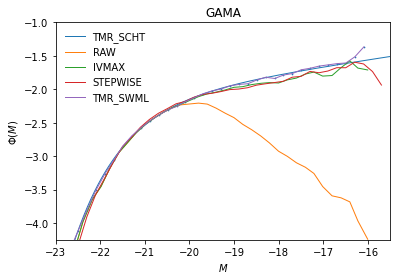

In [15]:
Ms = np.arange(-23., -15., 0.01)
sc = named_schechter(Ms, named_type='TMR')

pl.plot(Ms, np.log10(sc), label='TMR_SCHT', lw=1.)

pl.plot(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_N']), label='RAW', lw=1.)
pl.plot(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_IVMAX']), label='IVMAX', lw=1.)

offset = 1.15
pl.plot(lumfn_step['Ms'], np.log10(lumfn_step['PHI_STEP'])-offset, label='STEPWISE', lw=1.)

pl.scatter(lumfn_TMR['Ms'], lumfn_TMR['PHI_STEP'], s=0.5)
pl.plot(lumfn_TMR['Ms'], lumfn_TMR['PHI_STEP'], label='TMR_SWML', lw=1.)



pl.xlabel(r'$M$')
pl.ylabel(r'$\Phi(M)$')

pl.ylim(-4.25, -1.)
pl.xlim(-23., -15.5)

pl.legend(frameon=False, loc=2)
pl.title(survey.upper())

In [11]:
fpath = findfile(ftype='gold', dryrun=dryrun, version=version, survey=survey)
gold  = Table.read(fpath)
gold

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,JK
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,bytes4
560367,588848899375825135,180.12588394,-0.5937657,18.599897,0.17151,4,G12_Y1_ES2_327,6,21.23269,19.610481,18.504696,17.916262,17.505035,0.17151,582.1441797346662,38.825152798751276,G12,0,0,-496.88993234358065,-1.0917132746844402,-5.14954985191297,496.8761600457173,-3.0820340973700975,-5.647761503914847,1.1057854,18.599897,JK4
208588,587725074987876392,129.58898455,0.18220989,18.842192,0.07959,4,G09_Y1_AS2_288,6,21.44489,19.758184,18.888025,18.5268,18.288902,0.07959,253.66656373300447,37.02131612910743,G9,0,0,-149.73717907766925,181.07202516629394,0.7472277105197227,148.21162709629013,-182.3233794501662,0.5986188714962972,0.87015915,18.842192,JK0
63220,587722982829130118,215.01355265,-0.36740351,17.46823,0.12615,5,342314280604952576,6,19.526714,18.069859,17.392889,17.03065,16.77651,0.12615,415.48585538081625,38.09278121719966,G15,0,0,-302.16463914316876,-211.68449208440353,-2.365798161588926,303.9295332821462,209.13894264601316,-2.6705441953138664,0.6769695,17.46823,JK6
560751,588848899376480390,181.51136885,-0.61197239,17.807583,0.18032,4,G12_Y1_FS1_316,6,20.757238,18.82045,17.697247,17.266537,16.934586,0.18032,615.5098200833555,38.94617493112946,G12,0,0,-521.2659121873513,-13.75333135249762,-5.569755741903392,521.3571996662812,9.374387247227162,-6.09251431677462,1.1232033,17.807583,JK4
574176,588848899891528520,131.68433895,-0.03170999,19.117767,0.24259,4,G09_Y1_CS2_216,6,21.424124,19.90955,19.007305,18.596333,18.240759,0.24259,860.2179979362163,39.673042624260646,G9,0,0,-460.3831361113276,517.0071549581764,-0.3831370388663122,456.0235946178165,-520.8559800885297,-0.8403841397070202,0.90224457,19.117767,JK0
318633,587726032262463621,211.785782,1.9442089,18.505053,0.17924,4,G15_Y1_AN2_248,6,21.56819,19.48898,18.3083,17.9075,17.598957,0.17924,611.4024892001427,38.931636012673984,G15,0,0,-440.45933887902356,-272.9450647974357,17.58984255416682,442.753861946708,269.2357251033041,17.145909817703668,1.1806793,18.505053,JK6
184748,587725041701487062,177.65487771,-1.56037394,19.678253,0.13623,4,G12_Y2_019_091,5,22.277521,20.576443,19.644218,19.176764,18.803804,0.13623,451.7671900745132,38.27457343386233,G12,0,0,-397.1215760342764,16.26331077865705,-10.826817313569876,396.9599046904599,-19.598425155975455,-11.224847532098604,0.9322243,19.678253,JK3
509764,587729971789300707,222.72770784,-1.42435095,19.209635,0.23884,4,G15_Y1_GX2_327,6,20.903494,19.794823,19.080503,18.84659,18.612919,0.23884,845.0515736518563,39.63441607415034,G15,0,0,-500.9296817558317,-462.69332773669134,-16.955774995634496,504.78122389291343,458.4693635314442,-17.461918852167695,0.7143192,19.209635,JK8


##  Cobaya

In [19]:
# root = '/cosma/home/durham/{}/data/GAMA4/cobaya/'.format(os.environ['USER'])

In [20]:
# dat = Table.read(root + 'schechter_chain.1.txt', format='ascii')        

In [21]:
# samples = np.c_[dat['log10phistar'], dat['Mstar'], dat['alpha']]

In [22]:
# samples = MCSamples(samples=samples, names=['log10phistar', 'Mstar', 'alpha'], labels=['log10phistar', 'Mstar', 'alpha'])

In [18]:
# tmr_ref = {'log10phistar': -2.01, 'Mstar': -20.89, 'alpha': -1.25}

In [24]:
# g = plots.get_subplot_plotter()

In [17]:
# g.triangle_plot([samples], filled=True)        

# Done.